In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

In [4]:
import os
dirpath = '/Users/xinzheng/experiments/csdn/Olympic_DA/olympic_history'
data = pd.read_csv(os.path.join(dirpath, 'athlete_events.csv') )
regions = pd.read_csv(os.path.join(dirpath, 'noc_regions.csv') )

In [5]:
data.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [11]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [13]:
regions.head(5)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [14]:
merged = pd.merge(data, regions, on='NOC', how='left')

In [15]:
merged.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [16]:
# filter the gold medal
goldMedals = merged[(merged.Medal == 'Gold')]
goldMedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [17]:
# draw an age chart, filter out null data for age
goldMedals.isnull().any()

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal     False
region     True
notes      True
dtype: bool

In [18]:
# filter age data is null
goldMedals = goldMedals[np.isfinite(goldMedals['Age'])]


In [19]:
goldMedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


Text(0.5, 1.0, '金牌分布')

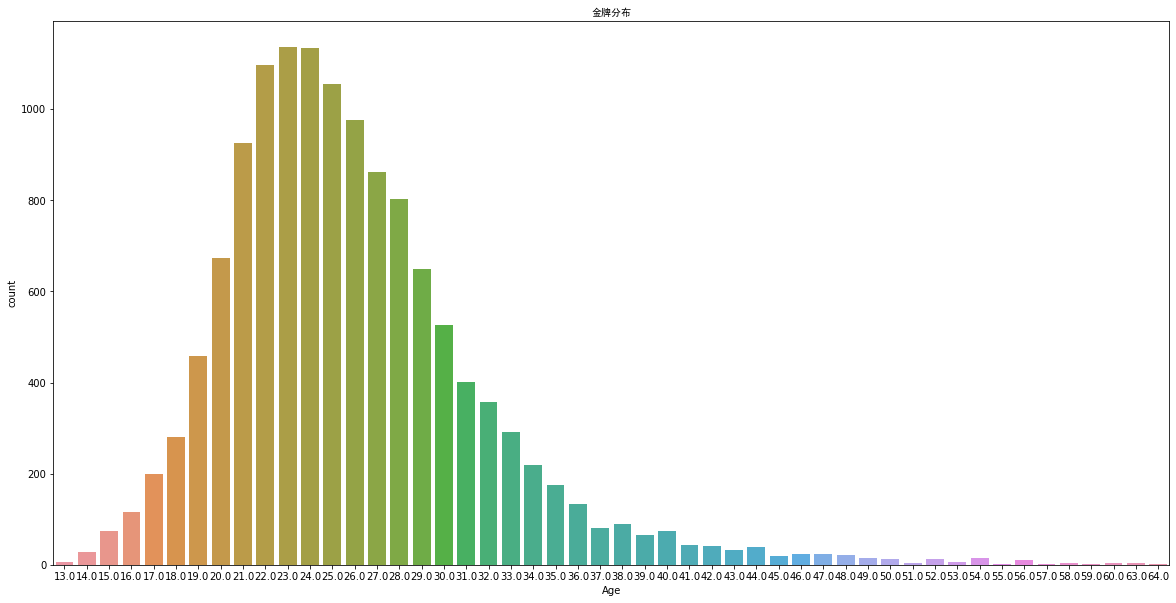

In [20]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sb.countplot(goldMedals['Age'])

# load font
from pylab import mpl
from matplotlib.font_manager import FontProperties
fontpath = '/Users/xinzheng/experiments/csdn/Olympic_DA/olympic_history/SimHei.ttf'

myfont = FontProperties(fname=fontpath)
mpl.rcParams['axes.unicode_minus'] = False
plt.title('金牌分布', FontProperties=myfont)

Text(0.5, 1.0, '运动项目')

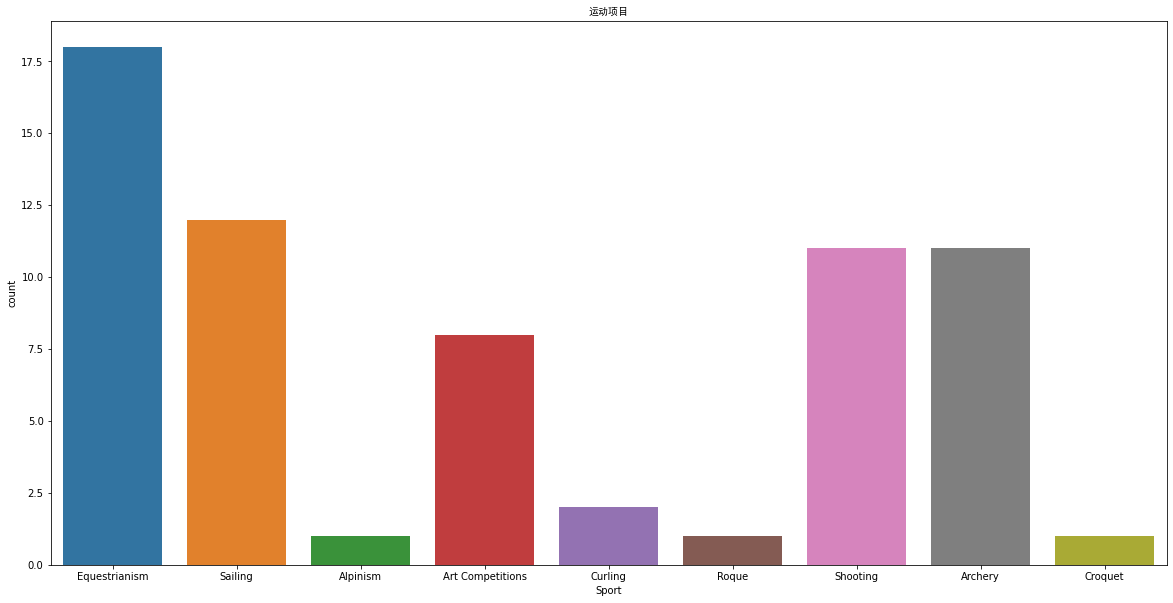

In [21]:
older50_df = goldMedals['Sport'][goldMedals['Age'] > 50]
plt.figure(figsize=(20, 10))
plt.tight_layout()
sb.countplot(older50_df)
plt.title('运动项目', FontProperties=myfont)



In [22]:
womanonly_df = merged[(merged.Sex == 'F') & (merged.Season == 'Summer')]
womanonly_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Netherlands,NaN
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway,NaN


Text(0.5, 1.0, '每届夏季奥运女子奖牌')

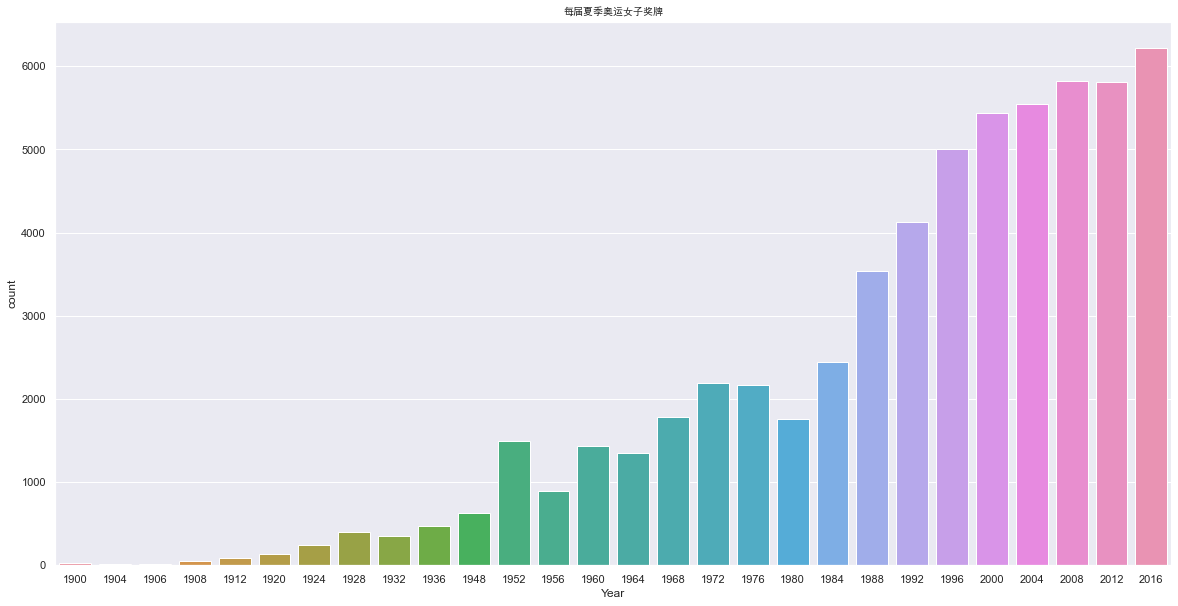

In [24]:
# 柱状图
# 每届夏季奥运会女子奖牌变化
# x轴： 年份
# y轴： 奖牌数
sb.set(style='darkgrid')
plt.figure(figsize=(20, 10))
sb.countplot(x='Year', data=womanonly_df)
plt.title('每届夏季奥运女子奖牌', FontProperties=myfont)

In [25]:
womanonly_df['ID'].loc[womanonly_df['Year'] == 1900].count()

33

In [26]:
# 获奖者身高与体重的关系
goldMedals.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [27]:
goldMedals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13224 entries, 3 to 271076
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      13224 non-null  int64  
 1   Name    13224 non-null  object 
 2   Sex     13224 non-null  object 
 3   Age     13224 non-null  float64
 4   Height  10532 non-null  float64
 5   Weight  10248 non-null  float64
 6   Team    13224 non-null  object 
 7   NOC     13224 non-null  object 
 8   Games   13224 non-null  object 
 9   Year    13224 non-null  int64  
 10  Season  13224 non-null  object 
 11  City    13224 non-null  object 
 12  Sport   13224 non-null  object 
 13  Event   13224 non-null  object 
 14  Medal   13224 non-null  object 
 15  region  13223 non-null  object 
 16  notes   171 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 2.4+ MB


In [30]:
# 过滤掉身高体重为空的数据
notNullMedals = goldMedals[(goldMedals['Height'].notnull()) & (goldMedals['Weight'].notnull())]

In [31]:
notNullMedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN
73,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [32]:
notNullMedals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10167 entries, 42 to 271076
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      10167 non-null  int64  
 1   Name    10167 non-null  object 
 2   Sex     10167 non-null  object 
 3   Age     10167 non-null  float64
 4   Height  10167 non-null  float64
 5   Weight  10167 non-null  float64
 6   Team    10167 non-null  object 
 7   NOC     10167 non-null  object 
 8   Games   10167 non-null  object 
 9   Year    10167 non-null  int64  
 10  Season  10167 non-null  object 
 11  City    10167 non-null  object 
 12  Sport   10167 non-null  object 
 13  Event   10167 non-null  object 
 14  Medal   10167 non-null  object 
 15  region  10166 non-null  object 
 16  notes   143 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 1.4+ MB


Text(0.5, 1.0, '金牌获得者身高与体重的关系')

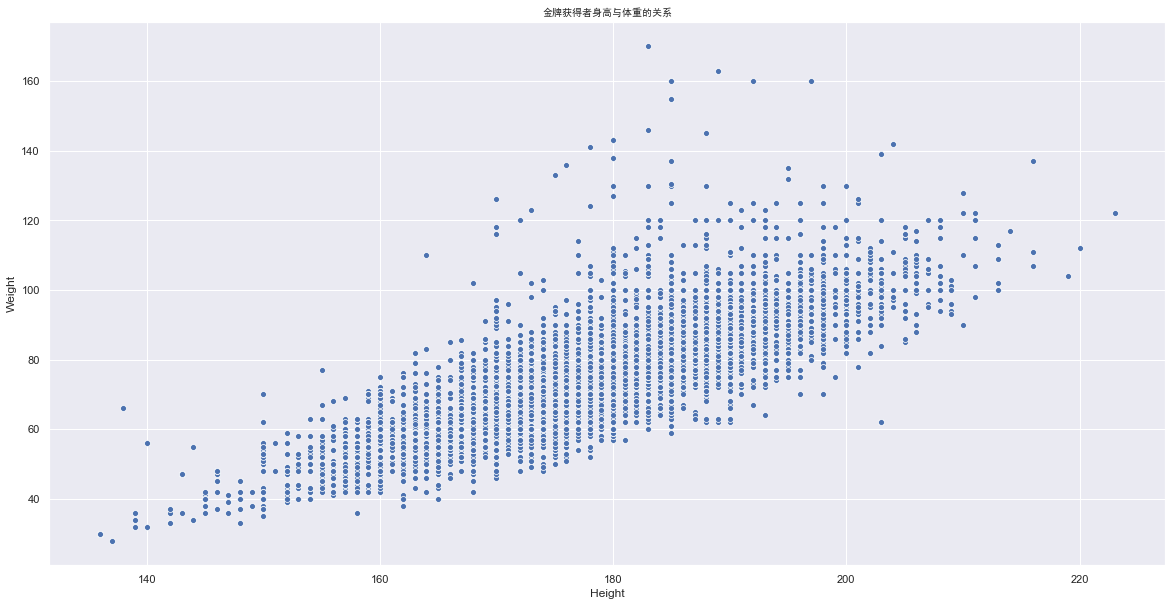

In [33]:
plt.figure(figsize=(20,10))
sb.scatterplot(x='Height', y='Weight', data=notNullMedals)
plt.title('金牌获得者身高与体重的关系', FontProperties=myfont)

In [34]:
# 看一下大于160公斤的选手的参赛项目
notNullMedals.loc[notNullMedals['Weight'] > 160]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
39181,20144,Andrey Ivanovich Chemerkin,M,24.0,183.0,170.0,Russia,RUS,1996 Summer,1996,Summer,Atlanta,Weightlifting,Weightlifting Men's Super-Heavyweight,Gold,Russia,NaN
268659,134407,Leonid Ivanovych Zhabotynskiy,M,26.0,189.0,163.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Weightlifting,Weightlifting Men's Heavyweight,Gold,Russia,NaN
268660,134407,Leonid Ivanovych Zhabotynskiy,M,30.0,189.0,163.0,Soviet Union,URS,1968 Summer,1968,Summer,Mexico City,Weightlifting,Weightlifting Men's Heavyweight,Gold,Russia,NaN


In [36]:
# 奥运会运动员随时间变化
# 男女运动员数量的变化
# 运动员年龄，体重，身高的变化

MenOverTime = merged[(merged.Sex=='M') & (merged.Season=='Summer')]
WomenOverTime = merged[(merged.Sex=='F') & (merged.Season=='Summer')]


Text(0.5, 1.0, '男性运动员人数随时间的变化')

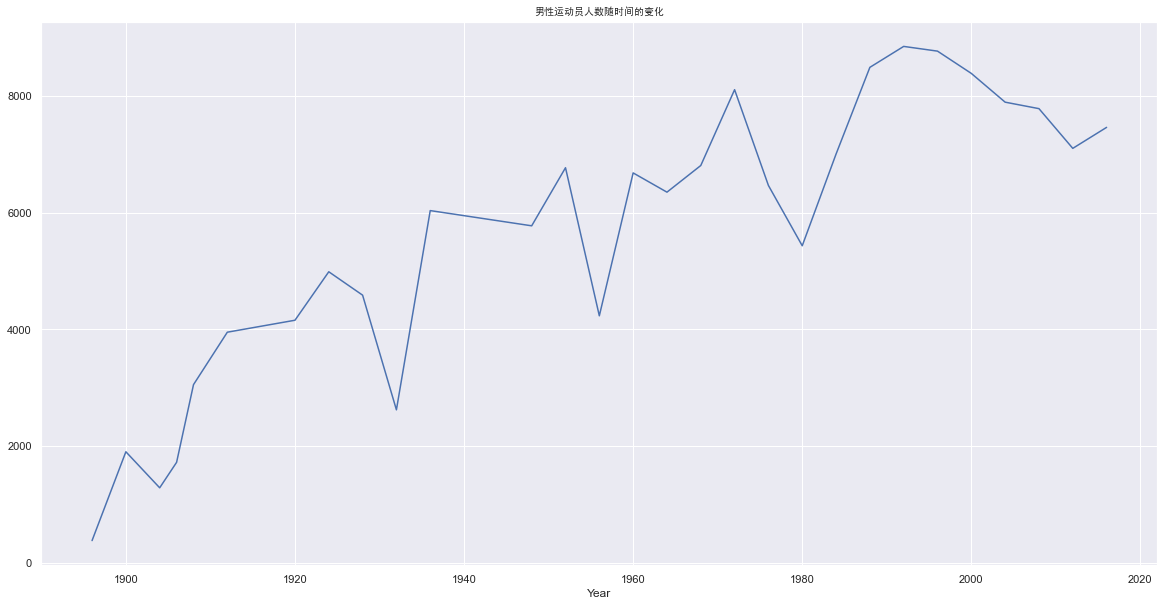

In [42]:
MenOverTime.head()
part = MenOverTime.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:, 'M'].plot()
plt.title('男性运动员人数随时间的变化', FontProperties=myfont)

Text(0.5, 1.0, '男性运动员人数随时间的变化')

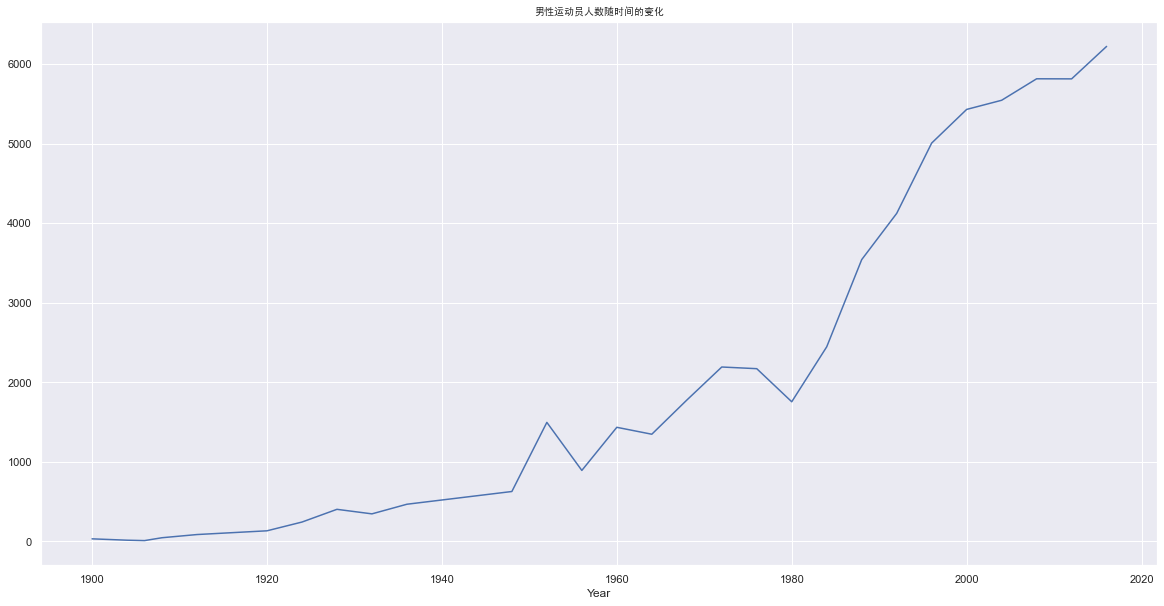

In [43]:
part1 = WomenOverTime.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part1.loc[:, 'F'].plot()
plt.title('男性运动员人数随时间的变化', FontProperties=myfont)

Text(0.5, 1.0, '男性运动员年龄随时间的变化')

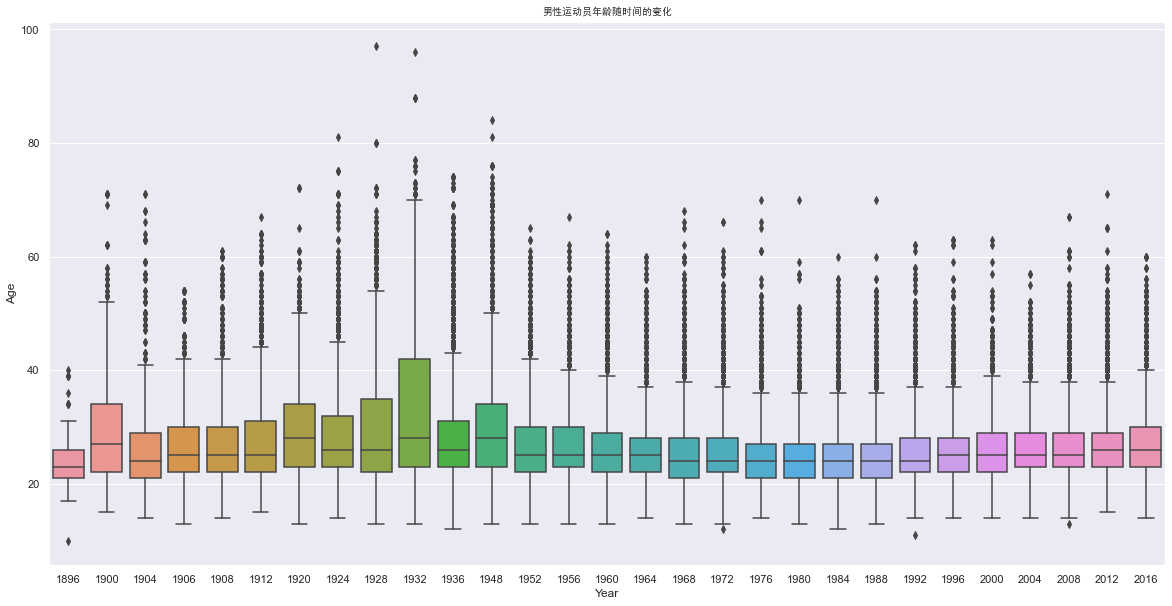

In [44]:
# atheletes age change by time
plt.figure(figsize=(20, 10))
sb.boxplot('Year', 'Age', data=MenOverTime)
plt.title('男性运动员年龄随时间的变化', FontProperties=myfont)

In [46]:
# 什么运动项目的运动员年龄超过80岁
MenOverTime.loc[MenOverTime['Age'] > 80].head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
9371,5146,George Denholm Armour,M,84.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,UK,NaN
60861,31173,Thomas Cowperthwait Eakins,M,88.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,USA,NaN
60862,31173,Thomas Cowperthwait Eakins,M,88.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,USA,NaN
60863,31173,Thomas Cowperthwait Eakins,M,88.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,USA,NaN
98118,49663,Winslow Homer,M,96.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,USA,NaN
154855,77710,Robert Tait McKenzie,M,81.0,NaN,NaN,Canada,CAN,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN,Canada,NaN
236912,118789,Louis Tauzin,M,81.0,NaN,NaN,France,FRA,1924 Summer,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Sculpturing,NaN,France,NaN
257054,128719,John Quincy Adams Ward,M,97.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN,USA,NaN


Text(0.5, 1.0, '男性运动员体重随时间变化')

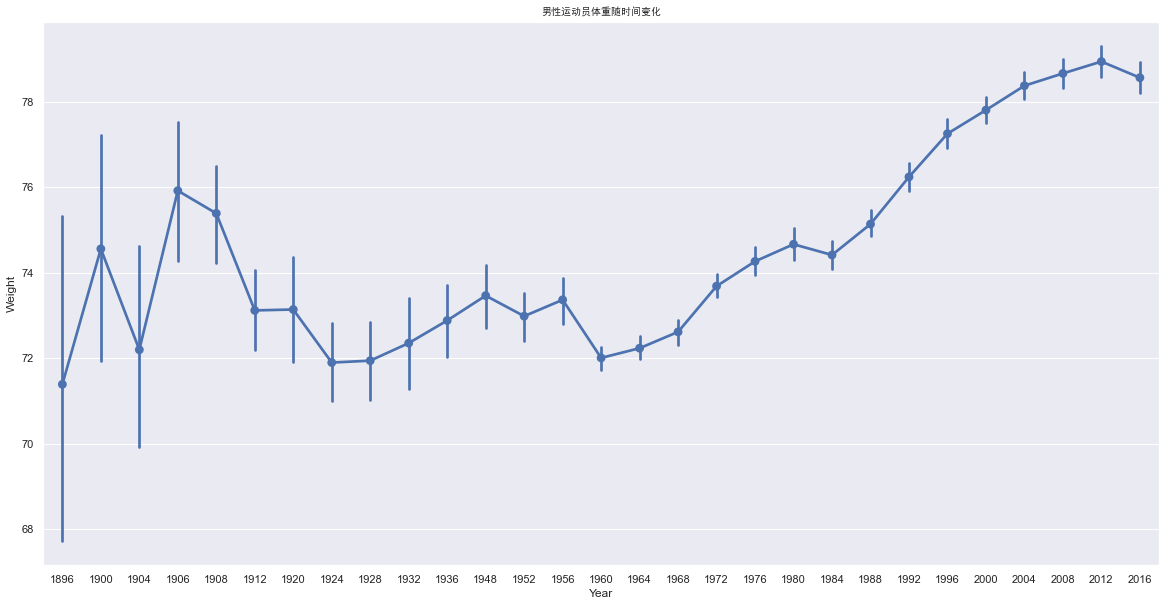

In [47]:
# 体重随时间变化
plt.figure(figsize=(20, 10))
sb.pointplot('Year', 'Weight', data=MenOverTime)
plt.title('男性运动员体重随时间变化', FontProperties=myfont)

Text(0.5, 1.0, '女性运动员体重随时间变化')

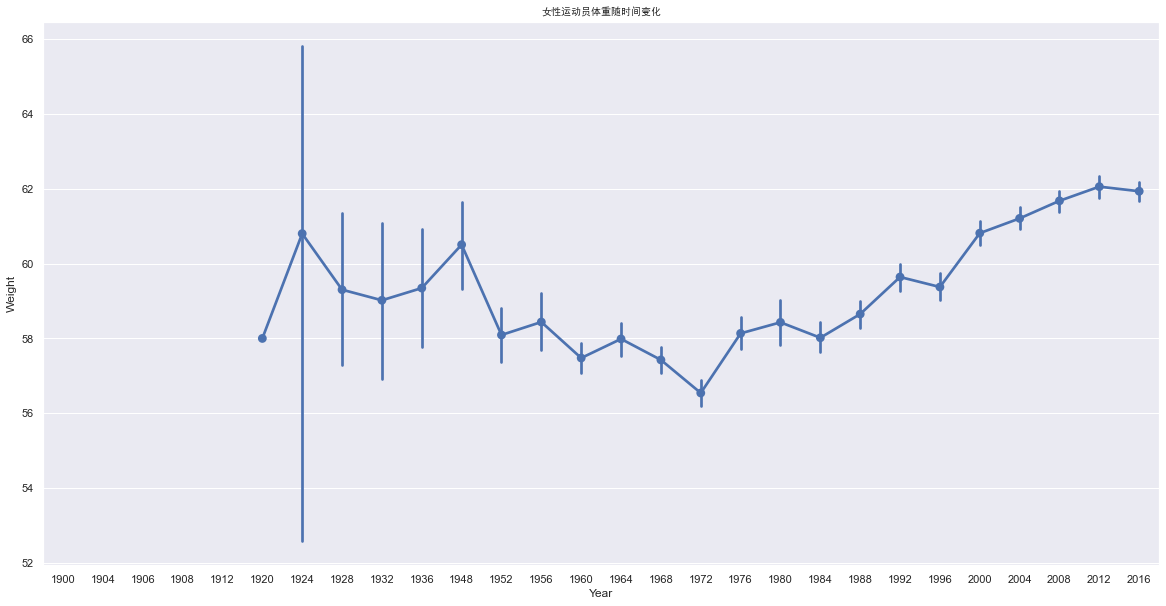

In [52]:
plt.figure(figsize=(20, 10))
sb.pointplot('Year', 'Weight', data=WomenOverTime)
plt.title('女性运动员体重随时间变化', FontProperties=myfont)

In [50]:
WomenOverTime.loc[WomenOverTime['Year'] < 1924].head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
283,150,Margaret Ives Abbott (-Dunne),F,23.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Gold,USA,NaN
284,151,Mary Perkins Ives Abbott (Perkins-),F,42.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,NaN,USA,NaN
1738,968,"Margarete ""Grete"" Adler",F,16.0,NaN,NaN,Austria,AUT,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Women's 100 metres Freestyle,NaN,Austria,NaN
1739,968,"Margarete ""Grete"" Adler",F,16.0,NaN,NaN,Austria,AUT,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Bronze,Austria,NaN
1756,975,Anna Mrtha Vilhelmina Adlerstrhle (von Oelreich-),F,39.0,NaN,NaN,Sweden,SWE,1908 Summer,1908,Summer,London,Tennis,"Tennis Women's Singles, Covered Courts",Bronze,Sweden,NaN
1768,978,Mrta Elvira Adlerz (-Hermansson),F,15.0,NaN,NaN,Sweden,SWE,1912 Summer,1912,Summer,Stockholm,Diving,Diving Women's Plain High,NaN,Sweden,NaN
1769,978,Mrta Elvira Adlerz (-Hermansson),F,23.0,NaN,NaN,Sweden,SWE,1920 Summer,1920,Summer,Antwerpen,Diving,Diving Women's Plain High,NaN,Sweden,NaN
2749,1531,Frances Helen Aitchison (-Leisk),F,30.0,NaN,NaN,Great Britain-1,GBR,1912 Summer,1912,Summer,Stockholm,Tennis,"Tennis Mixed Doubles, Covered Courts",Silver,UK,NaN
2750,1531,Frances Helen Aitchison (-Leisk),F,30.0,NaN,NaN,Great Britain,GBR,1912 Summer,1912,Summer,Stockholm,Tennis,"Tennis Women's Singles, Covered Courts",NaN,UK,NaN
4963,2830,Mary Aileen Allen (Conquest-),F,31.0,157.0,NaN,United States,USA,1920 Summer,1920,Summer,Antwerpen,Diving,Diving Women's Springboard,NaN,USA,NaN


Text(0.5, 1.0, '女性运动员体重随时间变化')

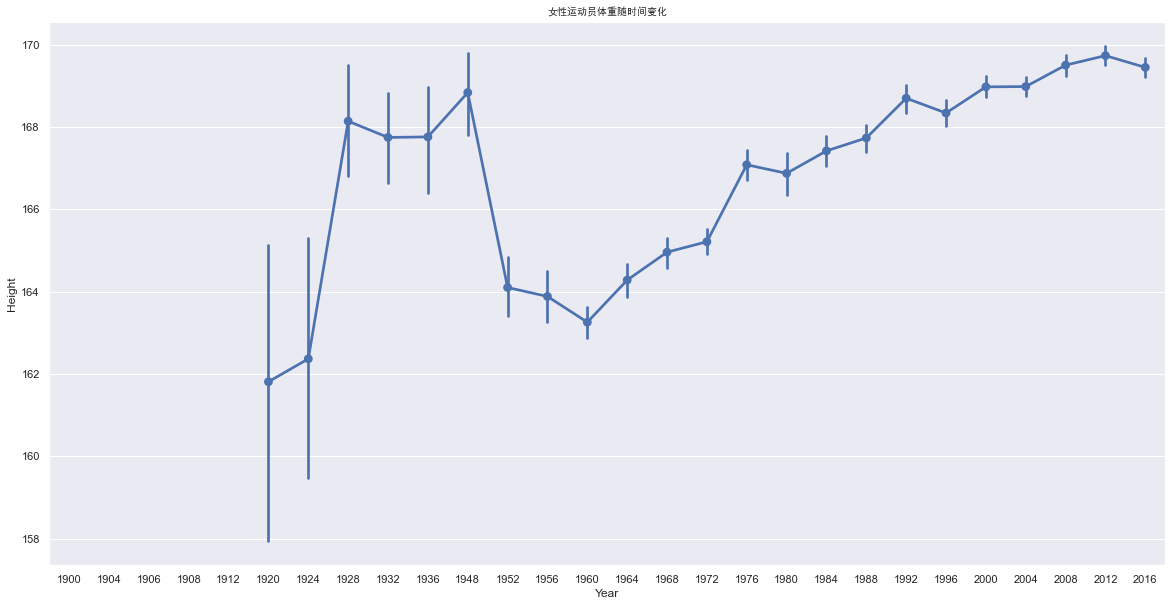

In [53]:
plt.figure(figsize=(20, 10))
sb.pointplot('Year', 'Height', data=WomenOverTime)
plt.title('女性运动员身高随时间变化', FontProperties=myfont)

Text(0.5, 1.0, '男性运动员身高随时间变化')

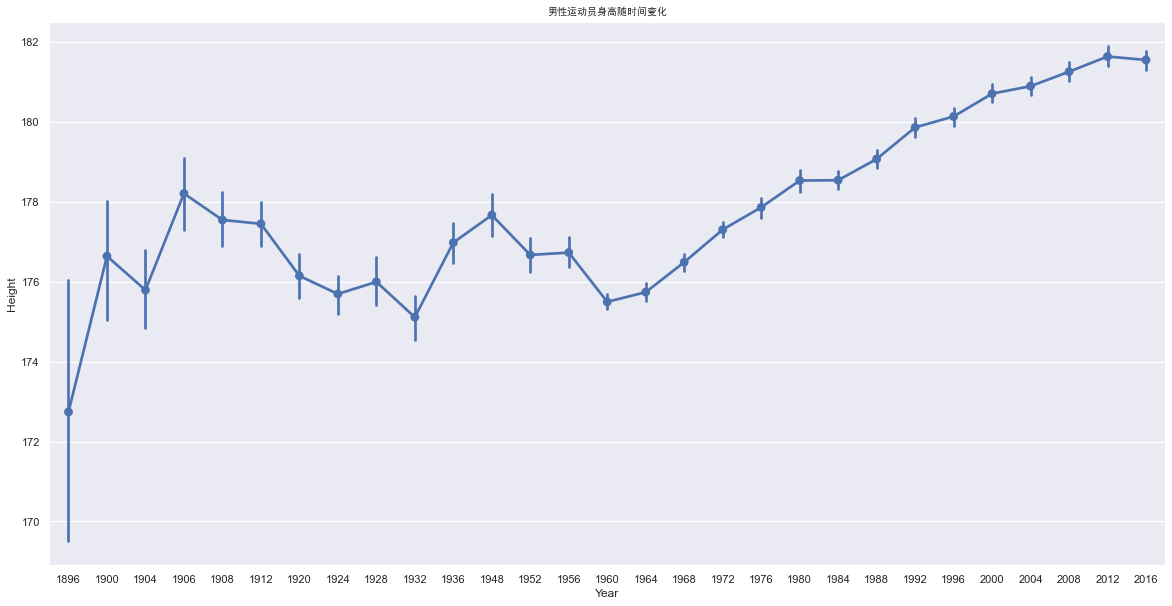

In [54]:
plt.figure(figsize=(20, 10))
sb.pointplot('Year', 'Height', data=MenOverTime)
plt.title('男性运动员身高随时间变化', FontProperties=myfont)